In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import gzip
from functools import reduce
import seaborn as sns
import os
import conda
from sklearn import preprocessing

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

In [2]:
finish = pd.read_csv("fin1shed_country.csv.gz", compression="gzip") 

In [3]:
finish.columns

Index(['iyear', 'country_txt', 'country', 'nkill', 'ransom_No', 'nwound',
       'property_Ok', 'individual_No', 'Firearms', 'Explosives', 'Melee',
       'GDP per capita (current US$)'],
      dtype='object')

In [4]:
#finish = finish.drop(columns="Unnamed: 0")

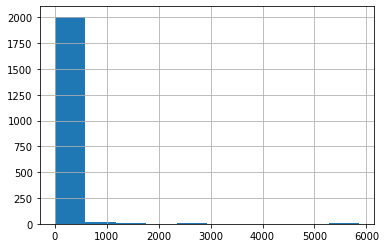

In [5]:
finish.nkill.hist()

In [6]:
finish.nkill.describe()

count    2045.000000
mean       68.349144
std       323.920130
min         0.000000
25%         0.000000
50%         3.000000
75%        24.000000
max      5860.000000
Name: nkill, dtype: float64

In [7]:
#finish["Nkill_q"] = pd.qcut(finish.nkill, q=3)
#finish["Nkill_q"].value_counts()

cut_labels_4 = ['A', 'B', 'C']
cut_bins = [-0.001, 0, 20, 5860]
finish["Nkill_q"] = pd.cut(finish.nkill, bins=cut_bins, labels=cut_labels_4)
finish["Nkill_q"].value_counts()

B    850
A    641
C    554
Name: Nkill_q, dtype: int64

In [8]:
finish.head(50)

,iyear,country_txt,country,nkill,ransom_No,nwound,property_Ok,individual_No,Firearms,Explosives,Melee,GDP per capita (current US$),Nkill_q
0,1970,Argentina,11,1.0,1.000000,0.000000,0.750000,1.000000,0.750000,0.000000,0.000000,1317.487535,B
1,1970,Dominican Republic,58,1.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,329.860648,B
2,1970,Germany,362,7.0,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2750.719742,B
3,1970,Germany,499,0.0,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2750.719742,A
4,1970,United Kingdom,603,9.0,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2347.544318,B
5,1970,United States,217,6.0,1.000000,0.295455,0.681818,1.000000,0.181818,0.636364,0.000000,5246.883717,B
6,1971,Costa Rica,49,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,567.410542,A
7,1971,Ireland,96,1.0,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1705.846288,B
8,1971,Spain,185,0.0,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1359.769397,A
9,1971,Turkey,209,0.0,1.000000,0.000000,1.000000,1.000000,0.000000,0.666667,0.000000,456.543021,A


In [9]:
le = preprocessing.LabelEncoder()
le.fit(finish.Nkill_q)
le.classes_

array(['A', 'B', 'C'], dtype=object)

In [10]:
finish.Nkill_q = le.transform(finish.Nkill_q)

In [11]:
finish

,iyear,country_txt,country,nkill,ransom_No,nwound,property_Ok,individual_No,Firearms,Explosives,Melee,GDP per capita (current US$),Nkill_q
0,1970,Argentina,11,1.0,1.000000,0.000000,0.750000,1.00,0.750000,0.000000,0.00,1317.487535,1
1,1970,Dominican Republic,58,1.0,1.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.00,329.860648,1
2,1970,Germany,362,7.0,1.000000,9.000000,1.000000,1.00,0.000000,0.000000,0.00,2750.719742,1
3,1970,Germany,499,0.0,1.000000,0.000000,1.000000,1.00,0.000000,1.000000,0.00,2750.719742,0
4,1970,United Kingdom,603,9.0,1.000000,0.000000,0.000000,1.00,1.000000,0.000000,0.00,2347.544318,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2040,2017,United States,217,13.0,0.880000,1.200000,0.520000,0.28,0.360000,0.040000,0.24,50085.766478,1
2041,2017,Venezuela,222,3.0,1.000000,0.000000,0.250000,1.00,0.500000,0.250000,0.00,11365.374196,1
2042,2017,West Bank and Gaza,155,11.0,0.900000,0.750000,0.400000,1.00,0.200000,0.050000,0.30,2392.371081,1
2043,2017,Yemen,228,85.0,0.979592,2.469388,0.326531,1.00,0.204082,0.653061,0.00,1296.057492,2


In [12]:
finish.to_csv('fin1shed_country_q.csv.gz', compression="gzip")